In [1]:
from google.cloud import vision
from pdf2image import convert_from_path
from PIL import Image, ImageDraw, ImageFont
import io
from pathlib import Path
import fitz  # PyMuPDF
import os
from xml.sax.saxutils import escape

In [2]:
from ocr_processing import build_processed_pdf, save_processed_pdf_data, load_processed_PDF_data

In [3]:
client = vision.ImageAnnotatorClient()

I0000 00:00:1732323088.455620 3443230 check_gcp_environment_no_op.cc:29] ALTS: Platforms other than Linux and Windows are not supported


In [4]:

def save_xml_text_file(root_dir, title_file, text_data):
    """
    Generates and saves an XML file with a title and pages, where each page contains text data.
    
    Parameters:
        root_dir (str): The root directory where the XML file will be saved.
        title_file (str): The title to be used in the XML file and filename.
        text_data (list of str): List of extracted text for each page.
    """
    # Define the XML file path
    xml_file_path = os.path.join(root_dir, title_file, f"full_OCR_text_{title_file}.xml")
    os.makedirs(os.path.dirname(xml_file_path), exist_ok=True)
    
    # Start writing the XML file
    with open(xml_file_path, "w", encoding="utf-8") as xml_file:
        # Write XML declaration and root element with title
        xml_file.write("<?xml version='1.0' encoding='UTF-8'?>\n")
        xml_file.write(f"<document>\n  <title>{escape(title_file)}</title>\n")
        
        # Add each page with its content, escaping the text for XML safety
        for i, text in enumerate(text_data):
            # Escape text content to handle special characters
            escaped_text = escape(text)
            # Write each page as <page page="1">...</page>
            xml_file.write(f"  <page page='{i+1}'>\n")
            xml_file.write(f"    {escaped_text}\n")
            xml_file.write("  </page>\n")
        
        # Close the root element
        xml_file.write("</document>")

    print(f"XML file successfully saved at {xml_file_path}")

In [5]:
def full_pdf_process(pdf_dir, pdf_filename, output_dir):
    current_title, ext = os.path.splitext(pdf_filename)
    assert ext == ".pdf", f"Expected .pdf, got {ext}"
    text_pages, marked_images = build_processed_pdf(pdf_dir, pdf_filename)
    save_annotated_text_and_image_data(output_dir, current_title, text_pages, marked_images)
    save_xml_text_file(output_dir, current_title, text_pages)
    return text_pages, marked_images

In [6]:
# directory to read pdfs from
pdf_dir =Path("../PDF/Phat_Giao_journals")

# directory to save output
output_dir = Path("../processed_journal_data")

In [7]:
#annotation_font_path = Path("/System/Library/Fonts/Supplemental/Arial.ttf")

In [8]:
pdf_to_process = pdf_dir / "TEST_phat-giao-viet-nam-1956-25-26.pdf"
basename = pdf_to_process.stem
pdf_to_process, basename

(PosixPath('../PDF/Phat_Giao_journals/TEST_phat-giao-viet-nam-1956-25-26.pdf'),
 'TEST_phat-giao-viet-nam-1956-25-26')

In [9]:
Path.exists(pdf_to_process)

True

In [10]:
text_pages, word_locations_list, annotated_images, unannotated_images = build_processed_pdf(pdf_to_process, client)

Processing document with 5 pages...
Processing page 1/5...
Processing page 2/5...
Processing page 3/5...
Processing page 4/5...
Processing page 5/5...


In [11]:
text_pages[0]

'PHÁT GIÁO\nVIỆT-NAM\nNGUYỆT -SAN\nA\nDICH THE\nSỐ 25 VÀ 26 ĐẶC SAN KỶ NIỆM MỞ ĐẦU NĂM THỨ BA\nSỐNG HỘI PHẬT - GIÁO VIỆT NAM XUẤT BẢN\n_ HUỆ QUANG'

In [12]:
output_dir

PosixPath('../processed_journal_data')

In [13]:
save_processed_pdf_data(output_dir, basename, text_pages, word_locations_list, annotated_images, unannotated_images)

Processed data saved in: ../processed_journal_data/TEST_phat-giao-viet-nam-1956-25-26


In [ ]:
#x, y, z, w = load_processed_PDF_data(output_dir, basename)

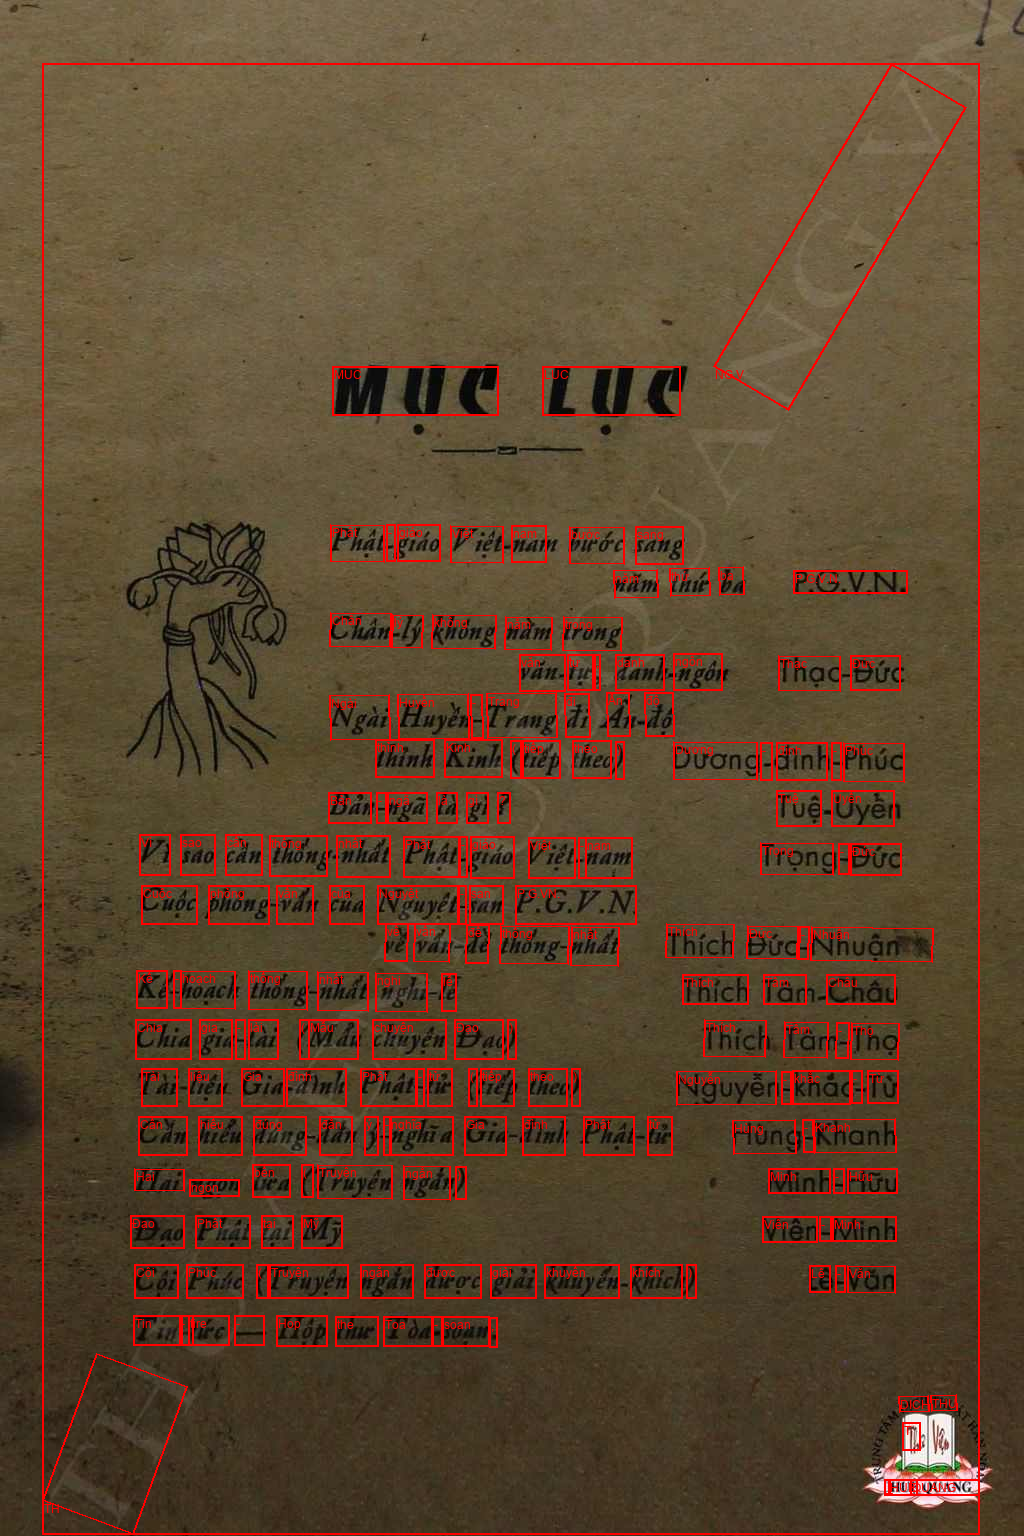

In [27]:
annotated_images[1]

In [19]:
#images[0].size

In [20]:
word_locations_list[0][0]

description: "PHÁT"
bounding_poly {
  vertices {
    x: 136
    y: 86
  }
  vertices {
    x: 527
    y: 82
  }
  vertices {
    x: 529
    y: 252
  }
  vertices {
    x: 138
    y: 256
  }
}

In [15]:
dir(word_locations_list[0][0])

['ByteSize',
 'Clear',
 'ClearExtension',
 'ClearField',
 'CopyFrom',
 'DESCRIPTOR',
 'DiscardUnknownFields',
 'Extensions',
 'FindInitializationErrors',
 'FromString',
 'HasExtension',
 'HasField',
 'IsInitialized',
 'ListFields',
 'MergeFrom',
 'MergeFromString',
 'ParseFromString',
 'SerializePartialToString',
 'SerializeToString',
 'SetInParent',
 'UnknownFields',
 'WhichOneof',
 '_CheckCalledFromGeneratedFile',
 '_ListFieldsItemKey',
 '_SetListener',
 '__class__',
 '__deepcopy__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '__unicode__']

In [16]:
from google.cloud.vision_v1.types import EntityAnnotation

In [17]:
help(EntityAnnotation)

Help on class EntityAnnotation in module google.cloud.vision_v1.types.image_annotator:

class EntityAnnotation(proto.message.Message)
 |  EntityAnnotation(mapping=None, *, ignore_unknown_fields=False, **kwargs)
 |  
 |  Set of detected entity features.
 |  
 |  Attributes:
 |      mid (str):
 |          Opaque entity ID. Some IDs may be available in `Google
 |          Knowledge Graph Search
 |          API <https://developers.google.com/knowledge-graph/>`__.
 |      locale (str):
 |          The language code for the locale in which the entity textual
 |          ``description`` is expressed.
 |      description (str):
 |          Entity textual description, expressed in its ``locale``
 |          language.
 |      score (float):
 |          Overall score of the result. Range [0, 1].
 |      confidence (float):
 |          **Deprecated. Use ``score`` instead.** The accuracy of the
 |          entity detection in an image. For example, for an image in
 |          which the "Eiffel Towe

In [21]:
text_pages[3]

'PHẬT-GIÁO VIỆT-NAM\nBƯỚC SANG NĂM THỨ BA\n| ới số 25 và 26 Phật giáo Việt Nam Nguyệt san bước\nsang năm thứ ba\nTrước khi bước những bước tiến mới, chúng ta hãy tạm\ndừng lại, nhìn lui con đường vừa qua để rút những bài học kinh\nnghiệm ngõ hầu tiến tới một cách mạnh mẽ, tránh những vấp ngã\nvà tiền đúng với mục tiêu đã nêu lên.\ngom\nSau mấy tháng điều tra dư luận độc giả, chúng tôi đã\ngóp được một mớ ý-kiểu về Nguyệt-san Phật-giáo Việt-Nam như sau:\nMột số độc giả than phiền rằng nội-dung của «Phật giáo\nViệt Nam quả cô đọng, chất-hẹp, chỉ quanh – quẩn trong phạm vi\nĐạo Phật, nên không thể phổ biến rộng ra ngoài được, mà chỉ dành\nriêng cho một số Phật tử thuần thành. Điều ấy quả có như thế. Mặc\ndù chúng tôi đã cố gắng mở rộng phạm vi nhưng không thể mở toang\nbiên giới của nó được, vì cái tên «Phật-giáo Việt-Nam đã đóng\nkhung nó lại rồi. Mỗi tạp chí đều có một chủ trương, một nội dung,\nmột mục-đích riêng biệt mà cái tên, là cái nhãn hiệu, đã nói lên một\nphần nào cái tinh thần

In [22]:
def convert_page_words(word_info):
    
    converted_info = []
    for word in word_info:
        text = word.description
        x = [vertex.x for vertex in word.bounding_poly.vertices]
        y = [vertex.y for vertex in word.bounding_poly.vertices]
        assert len(x) == 4, "not four pointed bounding box."

        width_bottom = x[1] - x[0] # point order is: bottom-left, bottom-right, top-right, top-left
        width_top = x[2] - x[3]
        height_left = y[3] - y[0]
        height_right = y[2] - y[1] # this according to the layout of bounding poly

        if width_bottom != width_top:
            print(f"Warning bounding box width mismatch for: {text}, skipping.")
            continue
        if height_left != height_right:
            print(f"Warning bounding box height mismatch for: {text}, skipping.")
            continue
        
        new_info = [text, (x[0], y[0]), width_bottom, height_left]
        converted_info.append(new_info)
    
    return converted_info

In [25]:
new_info = convert_page_words(word_locations_list[1])

Warning bounding box height mismatch for: TH, skipping.


In [26]:
new_info

[['MUC', (332, 366), 166, 49],
 ['LUC', (542, 366), 138, 49],
 ['Phật', (330, 524), 54, 37],
 ['-', (386, 524), 9, 37],
 ['giáo', (397, 524), 43, 37],
 ['Việt', (450, 525), 53, 37],
 ['nam', (511, 525), 35, 37],
 ['bước', (569, 526), 55, 37],
 ['sang', (635, 526), 48, 38],
 ['NG.V', (713, 366), 178, 44],
 ['năm', (613, 570), 44, 28],
 ['thứ', (669, 568), 40, 28],
 ['ba', (718, 567), 25, 28],
 ['P.G.V.N.', (793, 570), 114, 23],
 ['Chân', (330, 612), 61, 34],
 ['lý', (392, 614), 31, 33],
 ['không', (432, 614), 64, 34],
 ['nằm', (505, 616), 47, 33],
 ['trong', (563, 616), 59, 34],
 ['văn', (519, 654), 46, 37],
 ['tự', (567, 654), 26, 36],
 [',', (594, 654), 6, 36],
 ['danh', (615, 654), 49, 36],
 ['ngôn', (673, 653), 49, 37],
 ['Thạc', (778, 655), 62, 35],
 ['Đức', (850, 655), 50, 35],
 ['Dương', (673, 741), 84, 38],
 ['-', (760, 742), 12, 38],
 ['đình', (776, 742), 51, 38],
 ['-', (831, 742), 10, 38],
 ['Phúc', (843, 742), 61, 39],
 ['Tuệ', (776, 790), 45, 36],
 ['Uyển', (831, 790), 63, 

In [31]:
def collate_lines(words):
    """
    Collate OCR words into lines based on y-coordinates and line height, 
    assuming the words are already sorted by their y-coordinates.

    Args:
        words (list): List of words with their positions and dimensions 
                      in the form [text, (x, y), width, height].
    
    Returns:
        list: Collated lines in the form 
              [text_line, (start_x, start_y), (end_x, start_y), line_height].
    """
    if not words:
        return []
    
    # Sort words by y-coordinate (descending for top-to-bottom layout)
    # words = sorted(words, key=lambda w: (w[1][1], w[1][0]))
        
    collated_lines = []
    current_line = []
    current_y = words[0][1][1]
    current_height = words[0][3]

    for word in words:
        text, (x, y), width, height = word
        # Calculate tolerance for y-coordinate based on current line height
        tolerance = current_height * 0.5
        
        # Check if the word fits in the current line
        if abs(y - current_y) <= tolerance:
            current_line.append(word)
        else:
            # Finalize the current line
            if current_line:
                line_text = " ".join(w[0] for w in current_line)
                start_x = current_line[0][1][0]
                start_y = current_line[0][1][1]
                end_x = current_line[-1][1][0] + current_line[-1][2]
                collated_lines.append([line_text, (start_x, start_y), (end_x, start_y), current_height])
            
            # Start a new line
            current_line = [word]
            current_y = y
            current_height = height
    
    # Add the last line
    if current_line:
        line_text = " ".join(w[0] for w in current_line)
        start_x = current_line[0][1][0]
        start_y = current_line[0][1][1]
        end_x = current_line[-1][1][0] + current_line[-1][2]
        collated_lines.append([line_text, (start_x, start_y), (end_x, start_y), current_height])
    
    return collated_lines

In [32]:
collate_lines(new_info)

[['MUC LUC', (332, 366), (680, 366), 49],
 ['Phật - giáo Việt nam bước sang', (330, 524), (683, 524), 37],
 ['NG.V', (713, 366), (891, 366), 44],
 ['năm thứ ba P.G.V.N.', (613, 570), (907, 570), 28],
 ['Chân lý không nằm trong', (330, 612), (622, 612), 34],
 ['văn tự , danh ngôn Thạc Đức', (519, 654), (900, 654), 37],
 ['Dương - đình - Phúc', (673, 741), (904, 741), 38],
 ['Tuệ Uyển', (776, 790), (894, 790), 36],
 ['Trọng - Đức', (760, 842), (901, 842), 32],
 ['Ngài Huyền - Trang đi Ấn độ', (329, 695), (673, 695), 45],
 ['thỉnh Kinh ( tiếp theo )', (375, 739), (624, 739), 38],
 ['Bản - ngã là gì ?', (328, 792), (510, 792), 31],
 ['Vì sao cần thống nhất Phật - giáo Việt - nam', (139, 834), (632, 834), 41],
 ['Cuộc phỏng vấn của Nguyệt - san P.G.VN.', (141, 885), (636, 885), 39],
 ['về vấn đề thống nhất', (385, 923), (619, 923), 38],
 ['Kế - hoạch thống nhất nghi lễ', (136, 970), (456, 970), 38],
 ['Chia gia - lài ( Mẫu chuyện Đạo )', (135, 1019), (516, 1019), 40],
 ['Tài liệu Gia đình P

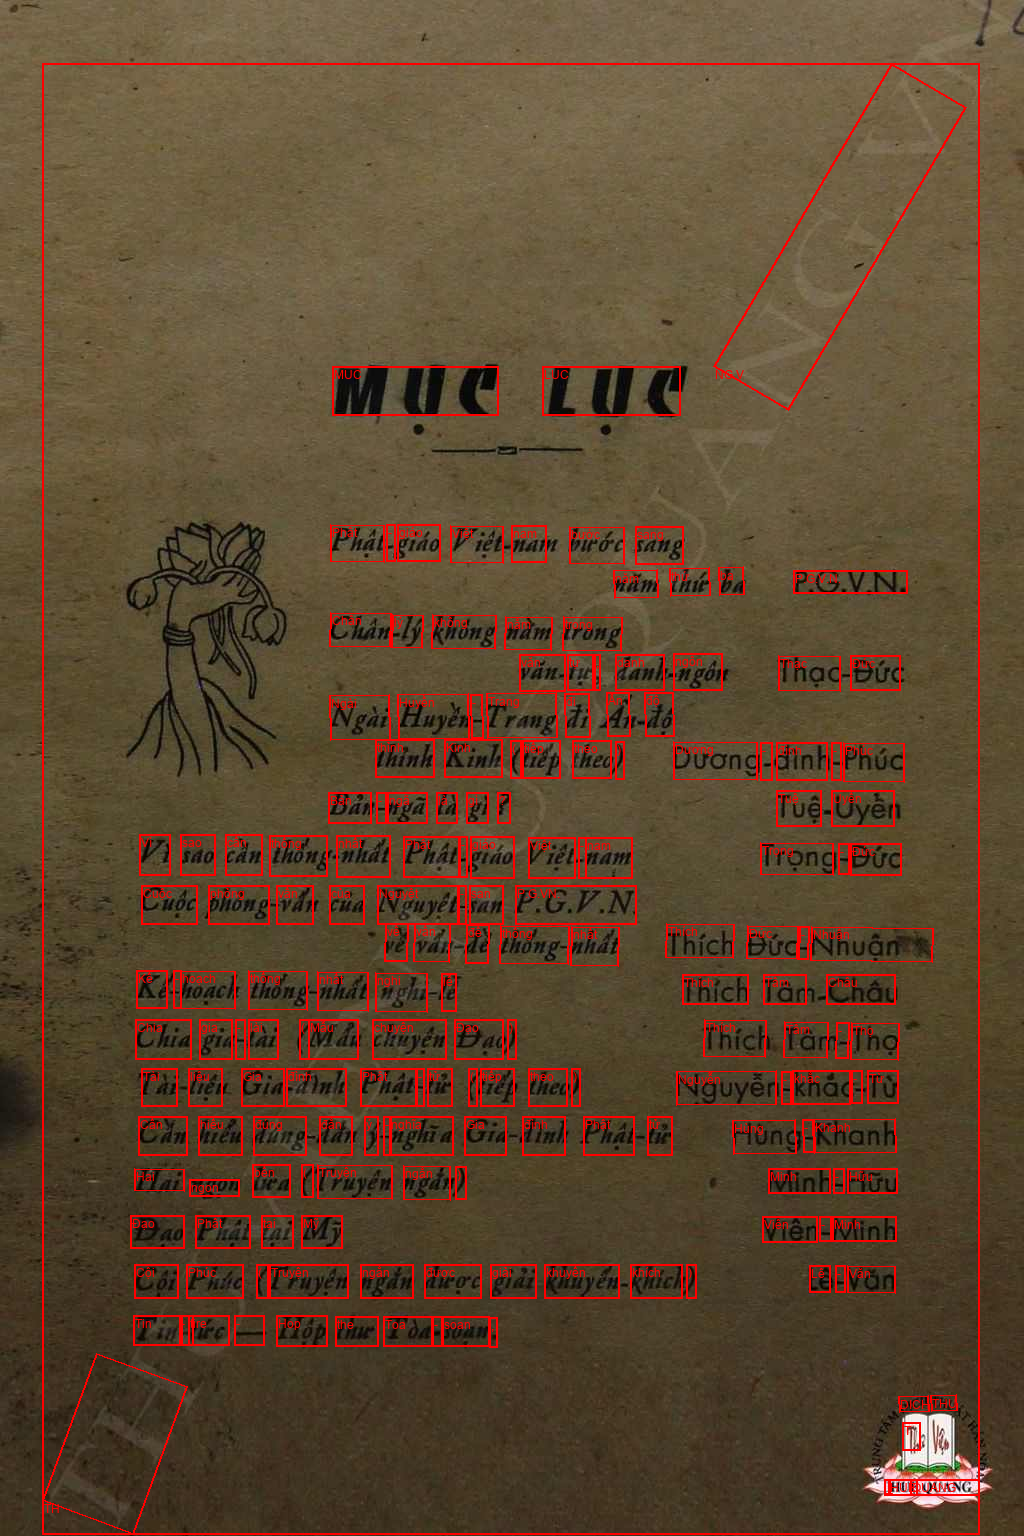

In [30]:
annotated_images[1]

In [38]:
new_info

[['PHẬT', (132, 124), 184, 420],
 ['GIÁO', (568, 124), 184, 344],
 ['VET', (124, 356), 120, 365],
 ['-', (501, 356), 120, 54],
 ['NAM', (574, 356), 120, 346],
 ['NGUYỆT', (385, 603), 48, 179],
 ['-', (566, 603), 48, 11],
 ['SÂN', (581, 603), 48, 82],
 ['SỐ', (132, 1390), 36, 42],
 ['1', (203, 1390), 36, 11],
 ['RA', (245, 1390), 36, 38],
 ['NGÀY', (310, 1390), 36, 96],
 ['15', (435, 1390), 36, 43],
 ['THÁNG', (505, 1390), 36, 116],
 ['8', (648, 1390), 36, 17],
 ['BÍNH', (693, 1390), 36, 80],
 ['THÂN', (803, 1390), 36, 83],
 ['CH', (904, 1390), 36, 44],
 ['TỔNG', (110, 1450), 45, 87],
 ['.', (210, 1450), 45, 7],
 ['HỘI', (231, 1450), 45, 53],
 ['PHẬT', (318, 1450), 45, 79],
 ['-', (402, 1450), 45, 13],
 ['GIÁO', (428, 1450), 45, 73],
 ['VIỆT', (539, 1450), 45, 61],
 ['-', (611, 1450), 45, 6],
 ['NAM', (631, 1450), 45, 73],
 ['XUẤT', (732, 1450), 45, 82],
 ['.', (820, 1450), 45, 12],
 ['The', (903, 1420), 30, 26],
 ['V', (928, 1420), 30, 19],
 ['HUỆ', (886, 1479), 15, 35],
 ['QUANG', (92

In [22]:
text_pages, marked_images = full_pdf_process(pdf_dir, "phat-giao-viet-nam-1956-25-26.pdf", output_dir)

beginning to process: ../PDF/Phat_Giao_journals/phat-giao-viet-nam-1956-25-26.pdf
processing page: 0...
processing page: 1...
processing page: 2...
processing page: 3...
processing page: 4...
processing page: 5...
processing page: 6...
processing page: 7...
processing page: 8...
processing page: 9...
processing page: 10...
processing page: 11...
processing page: 12...
processing page: 13...
processing page: 14...
processing page: 15...
processing page: 16...
processing page: 17...
processing page: 18...
processing page: 19...
processing page: 20...
processing page: 21...
processing page: 22...
processing page: 23...
processing page: 24...
processing page: 25...
processing page: 26...
processing page: 27...
Data successfully saved in ../processed_journal_data/phat-giao-viet-nam-1956-25-26
XML file successfully saved at ../processed_journal_data/phat-giao-viet-nam-1956-25-26/full_OCR_text_phat-giao-viet-nam-1956-25-26.xml


In [38]:
all_files =  os.listdir(pdf_dir)

In [42]:
all_files

['phat-giao-viet-nam-1956-15.pdf',
 'phat-giao-viet-nam-1956-01.pdf',
 'phat-giao-viet-nam-1956-28.pdf',
 'phat-giao-viet-nam-1956-14.pdf',
 'phat-giao-viet-nam-1956-02.pdf',
 'phat-giao-viet-nam-1956-16.pdf',
 'phat-giao-viet-nam-1956-20-21.pdf',
 'phat-giao-viet-nam-1956-03.pdf',
 'phat-giao-viet-nam-1956-07.pdf',
 'phat-giao-viet-nam-1956-13.pdf',
 'phat-giao-viet-nam-1956-12.pdf',
 'phat-giao-viet-nam-1956-04.pdf',
 'phat-giao-viet-nam-1956-11.pdf',
 'phat-giao-viet-nam-1956-05-06.pdf',
 'phat-giao-viet-nam-1956-09-10.pdf',
 'phat-giao-viet-nam-1956-17-18.pdf',
 'phat-giao-viet-nam-1956-25-26.pdf',
 'phat-giao-viet-nam-1956-23.pdf',
 'phat-giao-viet-nam-1956-22.pdf',
 'phat-giao-viet-nam-1956-27.pdf',
 'phat-giao-viet-nam-1956-19.pdf',
 'phat-giao-viet-nam-1956-24.pdf']

In [43]:
px_list = [all_files[2]] + all_files[6:16] + all_files[17:21]

In [44]:
px_list

['phat-giao-viet-nam-1956-28.pdf',
 'phat-giao-viet-nam-1956-20-21.pdf',
 'phat-giao-viet-nam-1956-03.pdf',
 'phat-giao-viet-nam-1956-07.pdf',
 'phat-giao-viet-nam-1956-13.pdf',
 'phat-giao-viet-nam-1956-12.pdf',
 'phat-giao-viet-nam-1956-04.pdf',
 'phat-giao-viet-nam-1956-11.pdf',
 'phat-giao-viet-nam-1956-05-06.pdf',
 'phat-giao-viet-nam-1956-09-10.pdf',
 'phat-giao-viet-nam-1956-17-18.pdf',
 'phat-giao-viet-nam-1956-23.pdf',
 'phat-giao-viet-nam-1956-22.pdf',
 'phat-giao-viet-nam-1956-27.pdf',
 'phat-giao-viet-nam-1956-19.pdf']

In [45]:
for filename in px_list:
        #print(filename)  # Do something with each file path
        full_pdf_process(pdf_dir, filename, output_dir)

beginning to process: ../PDF/Phat_Giao_journals/phat-giao-viet-nam-1956-28.pdf
processing page: 0...
processing page: 1...
processing page: 2...
processing page: 3...
processing page: 4...
processing page: 5...
processing page: 6...
processing page: 7...
processing page: 8...
processing page: 9...
processing page: 10...
processing page: 11...
processing page: 12...
processing page: 13...
processing page: 14...
processing page: 15...
processing page: 16...
processing page: 17...
processing page: 18...
processing page: 19...
processing page: 20...
processing page: 21...
processing page: 22...
processing page: 23...
processing page: 24...
processing page: 25...
processing page: 26...
processing page: 27...
processing page: 28...
processing page: 29...
processing page: 30...
processing page: 31...
processing page: 32...
processing page: 33...
processing page: 34...
processing page: 35...
processing page: 36...
processing page: 37...
processing page: 38...
processing page: 39...
processing 